In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df = pd.read_csv('Copy of loan_approval_ - loan_approval_impure.csv.csv')
print(df.head())

   ApplicantIncome  LoanAmount  CreditScore     Education SelfEmployed  \
0           4146.0       174.0        666.0  Not Graduate          Yes   
1           2028.0       184.0        700.0      Graduate           No   
2              NaN         NaN        740.0      Graduate           No   
3           3955.0       475.0        466.0      Graduate          Yes   
4           3613.0       188.0        304.0  Not Graduate          Yes   

   LoanApproved  
0           1.0  
1           NaN  
2           1.0  
3           1.0  
4           0.0  


In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ApplicantIncome  181 non-null    float64
 1   LoanAmount       182 non-null    float64
 2   CreditScore      181 non-null    float64
 3   Education        200 non-null    object 
 4   SelfEmployed     200 non-null    object 
 5   LoanApproved     180 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.5+ KB
None
       ApplicantIncome  LoanAmount  CreditScore  LoanApproved
count       181.000000  182.000000   181.000000    180.000000
mean       5961.730580  336.025624   628.736689      0.714124
std        4234.861716  176.490989   235.788521      0.745520
min        1132.000000  104.000000   304.000000      0.000000
25%        2518.000000  204.250000   466.000000      0.000000
50%        5396.000000  312.000000   575.000000      1.000000
75%        8013.000000  424.000000   

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ApplicantIncome  181 non-null    float64
 1   LoanAmount       182 non-null    float64
 2   CreditScore      181 non-null    float64
 3   Education        200 non-null    object 
 4   SelfEmployed     200 non-null    object 
 5   LoanApproved     180 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.5+ KB
None
       ApplicantIncome  LoanAmount  CreditScore  LoanApproved
count       181.000000  182.000000   181.000000    180.000000
mean       5961.730580  336.025624   628.736689      0.714124
std        4234.861716  176.490989   235.788521      0.745520
min        1132.000000  104.000000   304.000000      0.000000
25%        2518.000000  204.250000   466.000000      0.000000
50%        5396.000000  312.000000   575.000000      1.000000
75%        8013.000000  424.000000   

In [6]:
# Drop rows where LoanApproved is missing
df = df[~df['LoanApproved'].isnull()]
# Make target binary (0 or 1)
df = df[df['LoanApproved'].isin([0, 1])]
# Reset index
df = df.reset_index(drop=True)
# Handle missing values in features
for col in ['ApplicantIncome', 'LoanAmount', 'CreditScore']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['ApplicantIncome'] = df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].median())
# Clean SelfEmployed
df['SelfEmployed'] = df['SelfEmployed'].map({'Yes': 1, 'No': 0})
df['SelfEmployed'] = df['SelfEmployed'].fillna(0)
df['Education'] = df['Education'].fillna('Graduate')
df.head()

,ApplicantIncome,LoanAmount,CreditScore,Education,SelfEmployed,LoanApproved
0,4146.0,174.0,666.0,Not Graduate,1,1.0
1,5900.0,306.0,740.0,Graduate,0,1.0
2,3955.0,475.0,466.0,Graduate,1,1.0
3,3613.0,188.0,304.0,Not Graduate,1,0.0
4,2127.0,104.0,447.0,Graduate,0,1.0


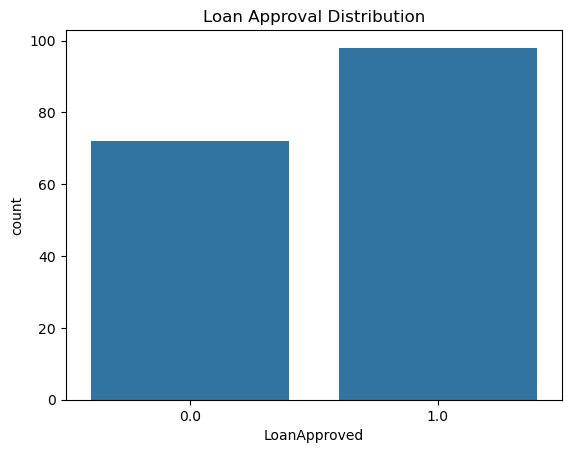

In [7]:
# Class balance
sns.countplot(x='LoanApproved', data=df)
plt.title('Loan Approval Distribution')
plt.show()

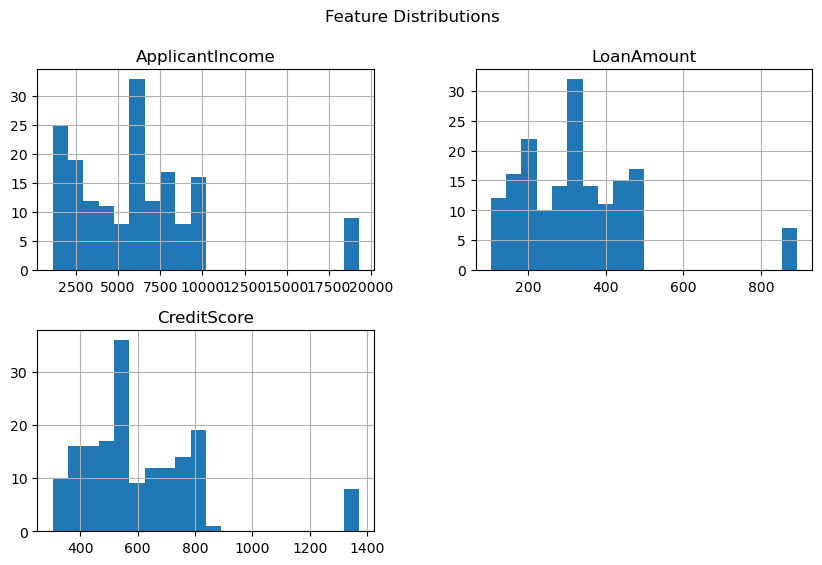

In [8]:
# Feature distributions
df[['ApplicantIncome', 'LoanAmount', 'CreditScore']].hist(bins=20, figsize=(10,6))
plt.suptitle('Feature Distributions')
plt.show()

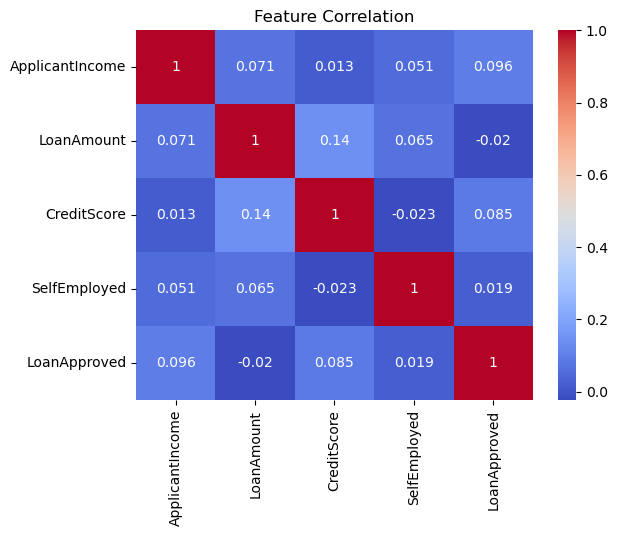

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [10]:
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df.head()

,ApplicantIncome,LoanAmount,CreditScore,Education,SelfEmployed,LoanApproved
0,4146.0,174.0,666.0,1,1,1.0
1,5900.0,306.0,740.0,0,0,1.0
2,3955.0,475.0,466.0,0,1,1.0
3,3613.0,188.0,304.0,1,1,0.0
4,2127.0,104.0,447.0,0,0,1.0


In [11]:
df['IncomePerLoan'] = df['ApplicantIncome'] / (df['LoanAmount'] + 1)
df.head()

,ApplicantIncome,LoanAmount,CreditScore,Education,SelfEmployed,LoanApproved,IncomePerLoan
0,4146.0,174.0,666.0,1,1,1.0,23.691429
1,5900.0,306.0,740.0,0,0,1.0,19.218241
2,3955.0,475.0,466.0,0,1,1.0,8.308824
3,3613.0,188.0,304.0,1,1,0.0,19.116402
4,2127.0,104.0,447.0,0,0,1.0,20.257143


In [12]:
X = df[['ApplicantIncome', 'LoanAmount', 'CreditScore', 'Education', 'SelfEmployed', 'IncomePerLoan']]
y = df['LoanApproved'].astype(int)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [16]:
from sklearn.model_selection import GridSearchCV

# Decision Tree tuning
params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    params,
    cv=5,
    scoring='accuracy'
)
grid_dt.fit(X_train, y_train)
dt = grid_dt.best_estimator_

# Predictions
y_pred_dt = dt.predict(X_test)


In [17]:
print('Logistic Regression Results:')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

Logistic Regression Results:
[[ 5 10]
 [10  9]]
              precision    recall  f1-score   support

           0       0.33      0.33      0.33        15
           1       0.47      0.47      0.47        19

    accuracy                           0.41        34
   macro avg       0.40      0.40      0.40        34
weighted avg       0.41      0.41      0.41        34

Accuracy: 0.4117647058823529


In [18]:
print('Decision Tree Results:')
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print('Accuracy:', accuracy_score(y_test, y_pred_dt))

Decision Tree Results:
[[ 6  9]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        15
           1       0.59      0.68      0.63        19

    accuracy                           0.56        34
   macro avg       0.55      0.54      0.54        34
weighted avg       0.55      0.56      0.55        34

Accuracy: 0.5588235294117647


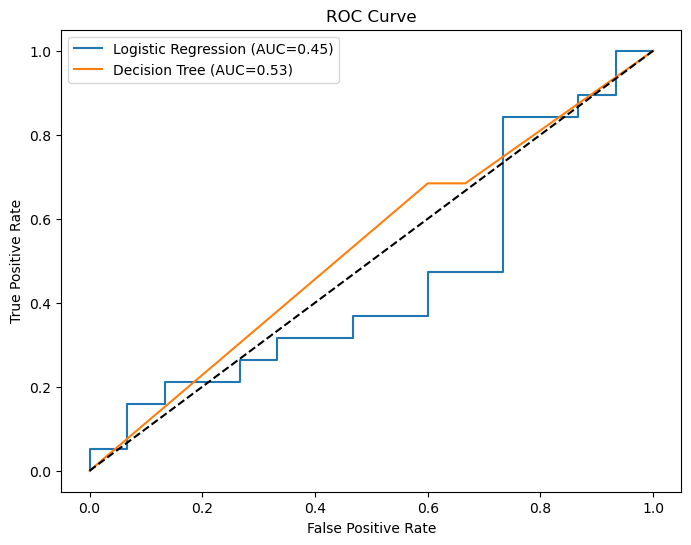

In [19]:
# Logistic Regression
y_prob_lr = lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Decision Tree
y_prob_dt = dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={auc_dt:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [21]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt)],
    'AUC': [auc_lr, auc_dt]
})
print(results)

                 Model  Accuracy       AUC
0  Logistic Regression  0.411765  0.452632
1        Decision Tree  0.558824  0.531579


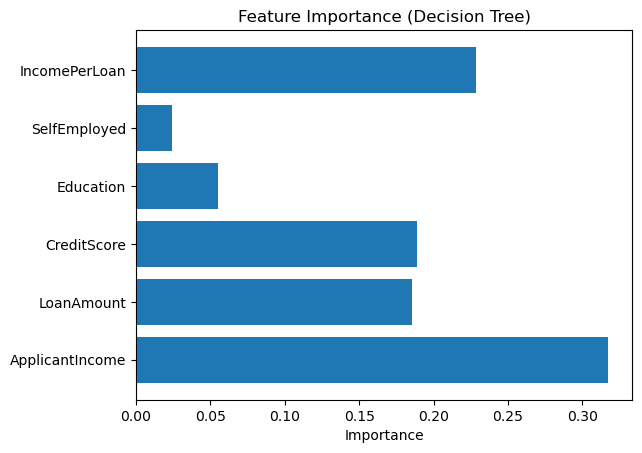

In [22]:
importances = dt.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importance (Decision Tree)')
plt.show()

In [23]:
joblib.dump(lr, 'loan_approval_lr.pkl')
joblib.dump(dt, 'loan_approval_dt.pkl')
joblib.dump(scaler, 'loan_approval_scaler.pkl')


['loan_approval_scaler.pkl']